<div style="display: flex; align-items: center;">
  <p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; text-align: left; margin-right: auto; line-height: 1.2;">
    <font color='black'><strong>Procesamiento Digital de Señales</strong><br>David Ochoa Cruz<br>R6575-2023</font>
  </p>
  <img src="logo-utn-frba-electronica.svg" alt="Logo UTN FRBA" width="200" height="40" style="flex-shrink: 0; margin-left: 10px;">
</div>

<p style="border: ridge white 2px; text-align: center;font-weight: italic; font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size:25px; background-color:#2CD546"><font color='white'>
    <strong>TS3: Simulación de un ADC (cuantización) parte 1/2</strong>
</p>

En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

- Frecuencia f<sub>0</sub> arbitraria, por ejemplo f<sub>0</sub> = f<sub>S</sub>/N = Δf.
- Amplitud normalizada, es decir, unitaria.

Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo s<sub>R</sub>, de forma tal que para un ADC de B bits y rango ± V<sub>F</sub>, el operador:

$$ s_Q = \mathop{Q}_{B,V_F}  \{s_R\} $$

generará una s<sub>Q</sub> comprendida entre ± V<sub>F</sub> y con valores discretos establecidos por el paso de cuantización q = 2V<sub>F</sub> / (2<sup>B</sup> - 1) ≈ V<sub>F</sub> / 2<sup>B-1</sup> (Volts).

Visualice en una misma gráfica s<sub>R</sub> y s<sub>Q</sub>, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para V<sub>F</sub> = 2 Volts y B = 4, 8 y 16 bits.

**Bonus**:
🤯 Analizar la señal de error e = s<sub>Q</sub> - s<sub>R</sub> verificando las descripciones estadísticas vistas en teoría (Distribución uniforme, media, varianza, incorrelación).

**Ayuda:**
+ Tienen las clases grabadas y una serie de tres videos míos con una explicación:

<div style="text-align: center;">
  <iframe width="800" height="450" src="https://www.youtube.com/embed/oaVkWCAId34" frameborder="0" allowfullscreen></iframe>
</div>

<div style="text-align: center;">
  <span style="border: 2px solid white; padding: 5px; display: inline-block; background-color: blue; font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px; color: #FFFFFF; font-weight: bold;">
    Plantilla inicial
  </span>
</div>
<br><br>
<div style="max-width: 100%; text-align: center;">
  <img src="ADC.jpg" alt="Texto alternativo" style="max-width: 80%;">
</div>

<br>
<span style="border: 2px solid #FFFFFF; padding: 5px; display: inline-block; background-color: #2CD546; font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px; color: #FFFFFF; font-weight: bold;">
    Resolución
</span>
<br><br>

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px; font-weight: bold;">
    Importamos librerías y módulos necesarios:
</p>

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pdsmodulos as pds
from scipy import signal as sig

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Definición de parámetros de simulación:
</p>

In [259]:
fsa = 200       # Frecuencia de muestreo analogico
os  = 4         # Oversampling 
fsd = fsa/os    # Frecuencia de muestreo digital
Na  = fsa       # Cantidad de muestras analogicas de la fuente 
Nd  = Na/os     # Cantidad de muestras digitalizadas por el ADC
B   = 3         # bits
Vcc = 3.3       # Tension de referencia
SNR = 20        # Relacion señal a ruido en dB

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Definimos los parámetros de la señal Senoidal:
</p>

In [260]:
AA  = np.sqrt(2)    # Amplitud de la señal analogica
ff  = 2             # Frecuencia de tono
dc  = 0             # Componente de continua
ph  = 0.0           # Fase

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Generamos y graficamos la señal senoidal ideal en tiempo continuo, discreto, cuantizado y su error de cuantización
</p>

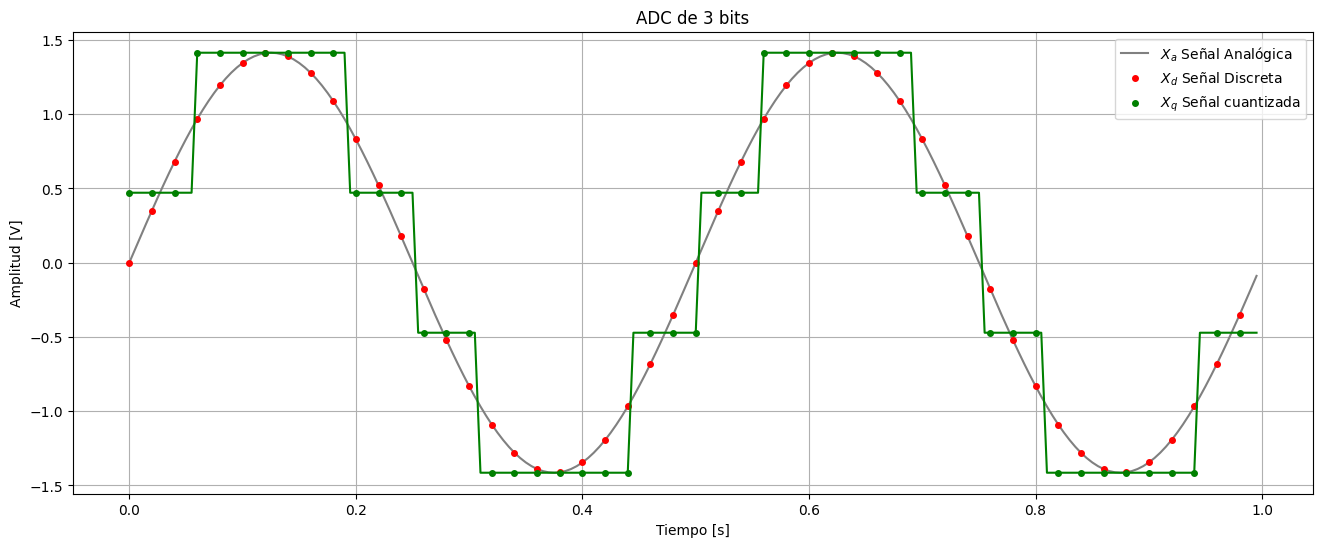

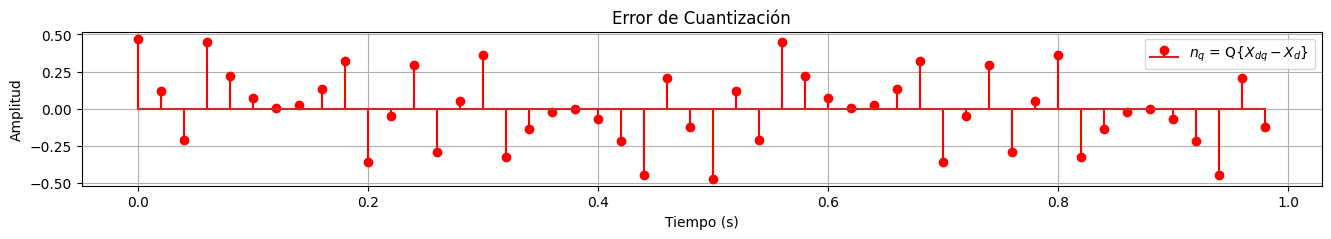

In [261]:
ta, xx  = pds.mi_funcion_sen(vmax=AA, ff=ff, dc=dc, ph=ph, nn=Na, fs=fsa)
xd      = xx[::os]
td      = ta[::os] 
q       = 2*Vcc/(2**B - 1)
xdq     = (np.floor(xd/q)*q + q/2)
xaq     = (np.floor(xx/q)*q + q/2)
nq      = xdq - xd  

plt.figure(0,figsize=(16, 6))  # Crea una figura con el tamaño deseado
plt.plot(ta, xx, color='gray', markersize=2, label='$X_{a}$ Señal Analógica')
plt.plot(td, xd, 'or',markersize=4, label='$X_{d}$ Señal Discreta')
plt.plot(ta, xaq, color='green', markersize=2)
plt.plot(td, xdq, 'go',markersize=4, label='$X_{q}$ Señal cuantizada')

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.title(f'ADC de {B} bits')
plt.grid(True)
plt.show()

plt.figure(1, figsize=(16, 2))
plt.stem(td, nq, linefmt='r-', markerfmt='ro', label='$n_{q}$ = Q{$X_{dq} - X_{d}$}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Error de Cuantización')
plt.grid(True)
plt.legend()
plt.show()

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Simulación de un ADC real:
</p>

In [262]:
fsa = 2000      # Frecuencia de muestreo analogico
os  = 4         # Oversampling 
fsd = fsa/os    # Frecuencia de muestreo digital
Na  = fsa       # Cantidad de muestras analogicas de la fuente 
Nd  = Na/os     # Cantidad de muestras digitalizadas por el ADC
B   = 8         # bits
Vcc = 3.3       # Tension de referencia
SNR = 30        # Relacion señal a ruido en dB

In [263]:
AA  = np.sqrt(2)    # Amplitud de la señal analogica
ff  = 10            # Frecuencia de tono
dc  = 0             # Componente de continua
ph  = 0.0           # Fase

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Generamos una señal senoidal real a partir de una ideal y le agregamos un ruido analógico de distribución normal
</p>

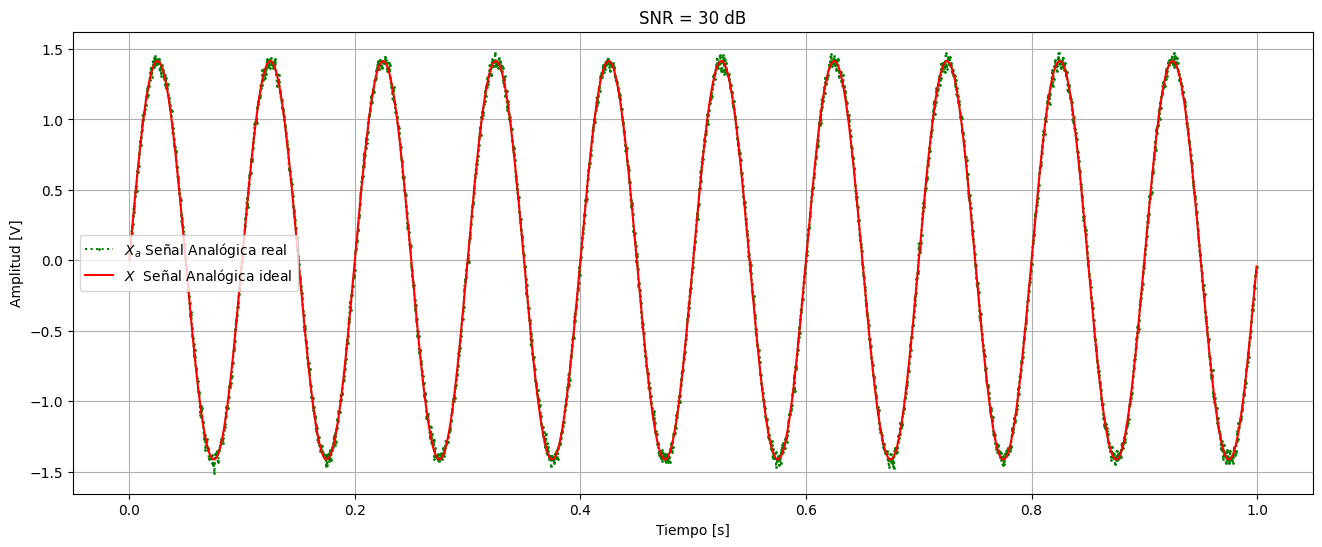

In [264]:
ta, xx  = pds.mi_funcion_sen(vmax=AA, ff=ff, dc=dc, ph=ph, nn=Na, fs=fsa)
na = pds.generar_ruido(signal=xx, snr=SNR, noise='normal')
xa = xx + na

plt.figure(2,figsize=(16, 6))  # Crea una figura con el tamaño deseado
#plt.plot(ta, xa, color='green', markersize=2, label='$X_{a}$ Señal Analógica ideal')
plt.plot(ta, xa, linestyle=':', color='green', marker='.', markersize=2, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$X_{a}$ Señal Analógica real')
plt.plot(ta, xx, color='red', markersize=2, label='$X$  Señal Analógica ideal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.title(f'SNR = {SNR} dB')
plt.grid(True)
plt.show()

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Simulación del filtro analógico de anti aliasing
</p>

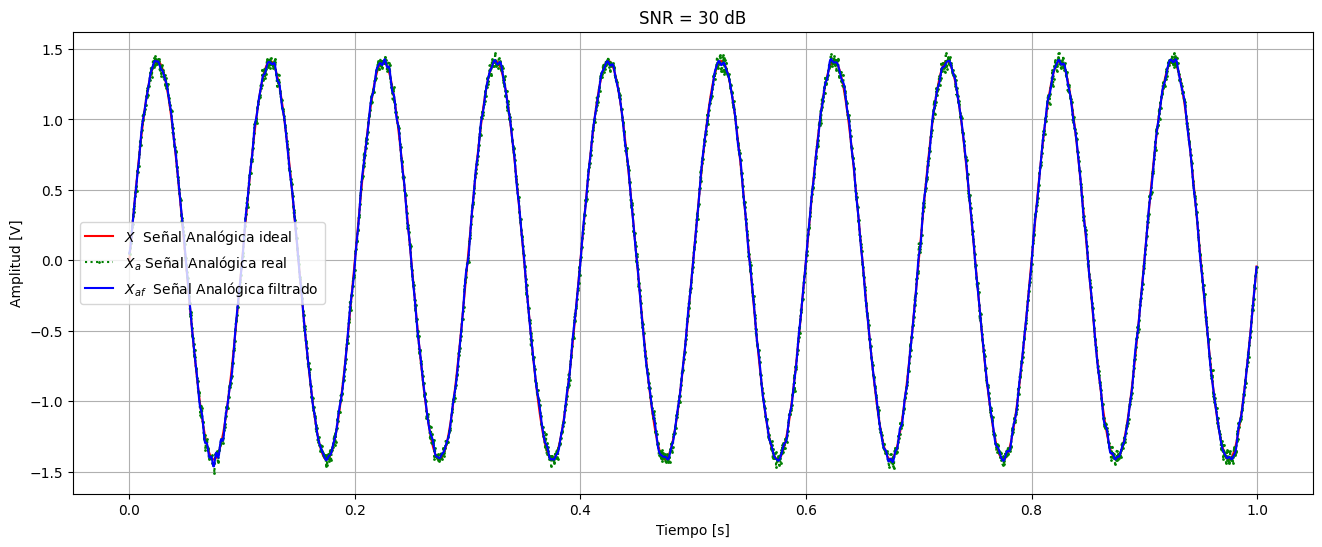

In [265]:
# Tipo de aporximacion        
aprox_name = 'butter'
# Requerimientos de plantilla
filter_type = 'lowpass'

ftran = 0.1
fstop = np.min([1/os + ftran/2, 1/os* 5/4])
fpass = np.max([fstop - ftran/2, fstop * 3/4]) 
ripple = 0.5 # dB
attenuation = 40 # dB

# como usaremos filtrado bidireccional, alteramos las restricciones para
# ambas pasadas
ripple = ripple / 2 # dB
attenuation = attenuation / 2 # dB


if aprox_name == 'butter':

    # order, wcutof = sig.buttord( 2*np.pi*fpass*fs/2, 2*np.pi*fstop*fs/2, ripple, attenuation, analog=True)
    orderz, wcutofz = sig.buttord( fpass, fstop, ripple, attenuation, analog=False)

elif aprox_name == 'cheby1':

    # order, wcutof = sig.cheb1ord( 2*np.pi*fpass*fs/2, 2*np.pi*fstop*fs/2, ripple, attenuation, analog=True)
    orderz, wcutofz = sig.cheb1ord( fpass, fstop, ripple, attenuation, analog=False)
    
elif aprox_name == 'cheby2':

    # order, wcutof = sig.cheb2ord( 2*np.pi*fpass*fs/2, 2*np.pi*fstop*fs/2, ripple, attenuation, analog=True)
    orderz, wcutofz = sig.cheb2ord( fpass, fstop, ripple, attenuation, analog=False)
    
elif aprox_name == 'ellip':
   
    # order, wcutof = sig.ellipord( 2*np.pi*fpass*fs/2, 2*np.pi*fstop*fs/2, ripple, attenuation, analog=True)
    orderz, wcutofz = sig.ellipord( fpass, fstop, ripple, attenuation, analog=False)


# Diseño del filtro digital

filter_sos = sig.iirfilter(orderz, wcutofz, rp=ripple, rs=attenuation, 
                            btype=filter_type, 
                            analog=False, 
                            ftype=aprox_name,
                            output='sos')

xaf = sig.sosfiltfilt(filter_sos, xa)

plt.figure(3,figsize=(16, 6))  # Crea una figura con el tamaño deseado
#plt.plot(ta, xa, color='green', markersize=2, label='$X_{a}$ Señal Analógica ideal')
plt.plot(ta, xx, color='red', label='$X$  Señal Analógica ideal')
plt.plot(ta, xa, linestyle=':', color='green', marker='.', markersize=2, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$X_{a}$ Señal Analógica real')
plt.plot(ta, xaf, color='blue', label='$X_{af}$  Señal Analógica filtrado')

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.title(f'SNR = {SNR} dB')
plt.grid(True)
plt.show()

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Limitamos la señal en amplitud según el rango de tensión de nuestro ADC
</p>

In [266]:
xa[xa > +Vcc] = +Vcc
xa[xa < -Vcc] = -Vcc

xaf[xaf > +Vcc] = +Vcc
xaf[xaf < -Vcc] = -Vcc

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Realizamos la discretización de la señal analógica y seguido de la operación de Diezmado
</p>

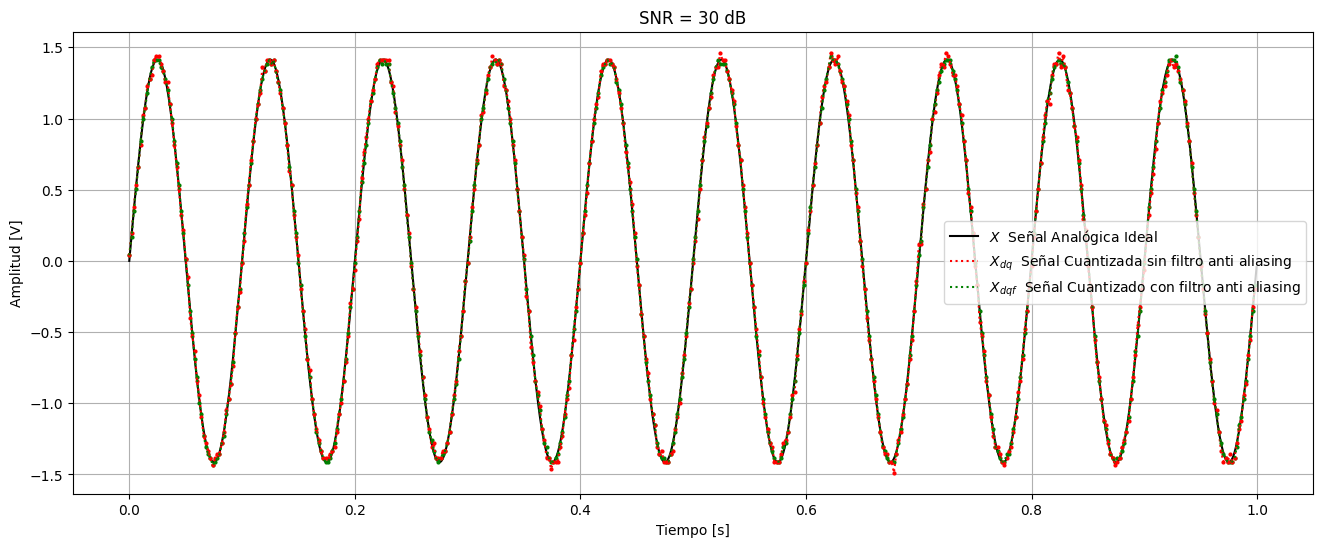

In [267]:
#%% Cuantizacion ADC
q    = 2*Vcc/(2**B - 1)
xdq  = (np.floor(xa/q)*q + q/2)[::os]
xdqf = (np.floor(xaf/q)*q + q/2)[::os]
td   = ta[::os]     
ndq  = xdq - xa[::os]
ndqf = xdqf - xaf[::os]

plt.figure(4,figsize=(16, 6))  # Crea una figura con el tamaño deseado
#plt.plot(ta, xa, color='green', markersize=2, label='$X_{a}$ Señal Analógica ideal')
plt.plot(ta, xx, color='black', label='$X$  Señal Analógica Ideal')
plt.plot(td, xdqf, 'go',markersize=2)
plt.plot(td, xdq, 'ro',markersize=2)
plt.plot(td, xdq, linestyle=':', color='red', markersize=4, markerfacecolor='none', markeredgecolor='red', fillstyle='none', label='$X_{dq}$  Señal Cuantizada sin filtro anti aliasing')
plt.plot(td, xdqf, linestyle=':', color='green', markersize=4, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$X_{dqf}$  Señal Cuantizado con filtro anti aliasing')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.title(f'SNR = {SNR} dB')
plt.grid(True)
plt.show()

<p style="font-family: 'American Typewriter', 'Courier New', Courier, 'Lucida Sans Typewriter', 'Lucida Typewriter', monospace; font-size: 20px;">
    Analisis frecuencial
</p>

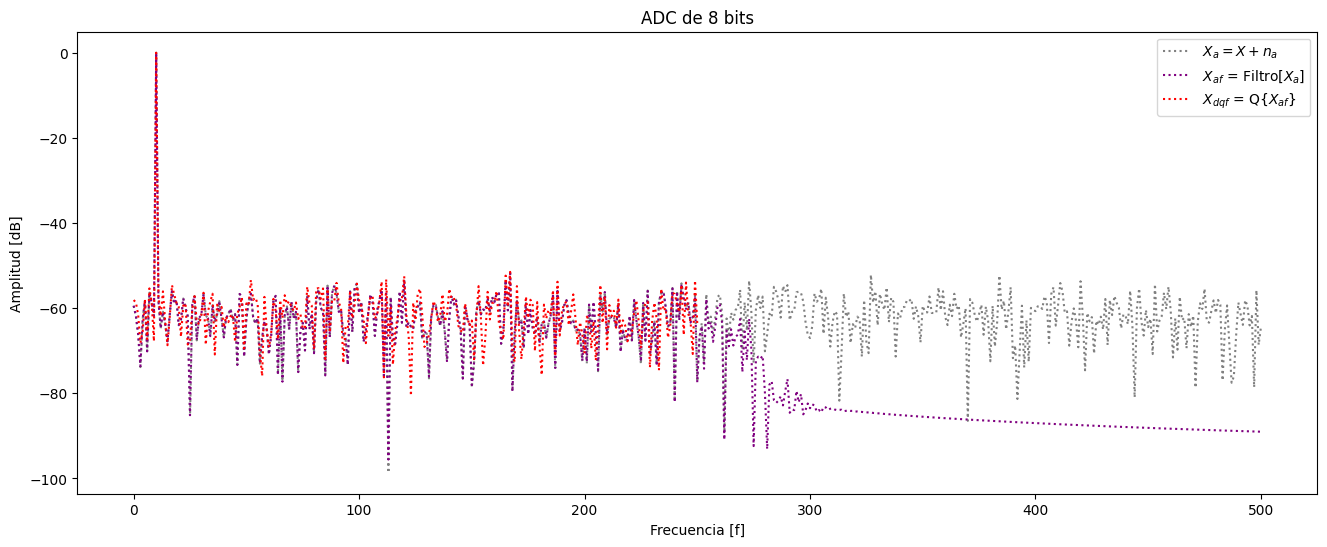

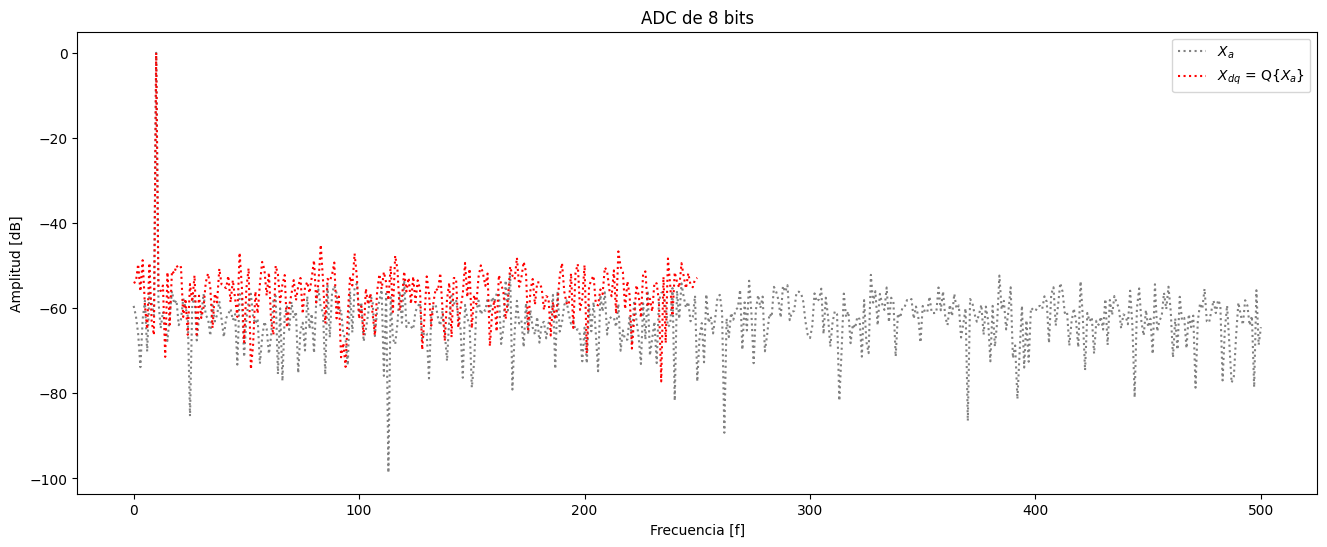

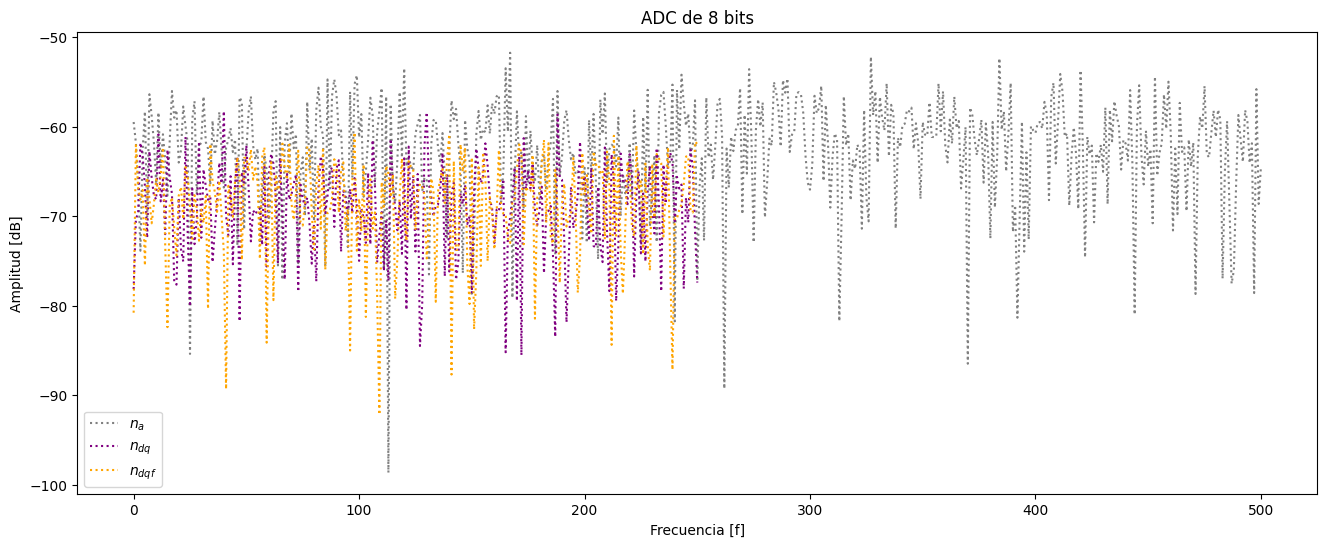

In [268]:
Xfft_xx  = 1/Na*np.fft.fft(xx, axis=0)

Xfft_xa  = 1/Na*np.fft.fft(xa, axis=0)
Xfft_xaf = 1/Na*np.fft.fft(xaf, axis=0)

Xfft_xdq = 1/Nd*np.fft.fft(xdq, axis=0)
Xfft_xdqf = 1/Nd*np.fft.fft(xdqf, axis=0)

# Crear un vector de frecuencia
dfa  = fsa/Na
dfd  = fsd/Nd

frequencies_a = np.arange(start=0, stop=(Na)*dfa, step=dfa)
frequencies_d = np.arange(start=0, stop=(Nd)*dfd, step=dfd)

bfrec_a = frequencies_a <= fsa/4
bfrec_d = frequencies_d <= fsd/2

#%% Grafico con filtro antialiasing
plt.figure(5,figsize=(16, 6))  # Crea una figura con el tamaño deseado
#plt.style.use('dark_background')
plt.plot(frequencies_a[bfrec_a], 10*np.log10(2*np.abs(Xfft_xa[bfrec_a])**2), color='gray', ls='dotted', label='$X_a = X + n_a$')
plt.plot(frequencies_a[bfrec_a], 10*np.log10(2*np.abs(Xfft_xaf[bfrec_a])**2), color='purple', ls='dotted', label='$X_{af}$ = Filtro[$X_a$]')
plt.plot(frequencies_d[bfrec_d], 10*np.log10(2*np.abs(Xfft_xdqf[bfrec_d])**2),  linestyle=':', label='$X_{dqf}$ = Q{$X_{af}$}', color='red')
plt.xlabel('Frecuencia [f]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.title(f'ADC de {B} bits')
plt.show()

#%% Grafico sin filtro antialiasing
plt.figure(6,figsize=(16, 6))  # Crea una figura con el tamaño desead
#plt.style.use('dark_background')
plt.plot(frequencies_a[bfrec_a], 10*np.log10(2*np.abs(Xfft_xa[bfrec_a])**2), color='gray', ls='dotted', label='$X_a$')
plt.plot(frequencies_d[bfrec_d], 10*np.log10(2*np.abs(Xfft_xdq[bfrec_d])**2),  linestyle=':', label='$X_{dq}$ = Q{$X_{a}$}', color='red')
plt.xlabel('Frecuencia [f]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.title(f'ADC de {B} bits')
plt.show()

#%% Analisis frecuencial
Xfft_na  = 1/Na*np.fft.fft(na, axis=0)

Xfft_ndq  = 1/Nd*np.fft.fft(ndq, axis=0)

Xfft_ndqf = 1/Nd*np.fft.fft(ndqf, axis=0)
# Crear un vector de frecuencia

#%% Grafico con filtro antialiasing
plt.figure(7,figsize=(16, 6))  # Crea una figura con el tamaño desead
#plt.style.use('dark_background')
plt.plot(frequencies_a[bfrec_a], 10*np.log10(2*np.abs(Xfft_na[bfrec_a])**2), color='gray', ls='dotted', label='$n_a$')
plt.plot(frequencies_d[bfrec_d], 10*np.log10(2*np.abs(Xfft_ndq[bfrec_d])**2), color='purple', ls='dotted', label='$n_{dq}$')
plt.plot(frequencies_d[bfrec_d], 10*np.log10(2*np.abs(Xfft_ndqf[bfrec_d])**2),  linestyle=':', label='$n_{dqf}$', color='orange')
plt.xlabel('Frecuencia [f]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.title(f'ADC de {B} bits')
plt.show()